In [100]:
import pandas as pd
import numpy as np
import os

# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set_theme()

%matplotlib inline

In [101]:
MAIN_PATH = '../input/vinbigdata-chest-xray-abnormalities-detection/'
train_df = pd.read_csv(os.path.join(MAIN_PATH,"train.csv"))
TRAIN_META = "../input/dicom-meta/train_meta.csv"

In [107]:
def load_train_df():
    path = os.path.join(MAIN_PATH,"train.csv")
    train_df = pd.read_csv(path)
    is_normal_df = train_df.groupby("image_id")["class_id"].agg(lambda s: (s == 14).sum()).reset_index().rename({"class_id": "num_normal_annotations"}, axis=1)
    is_normal_df["label"] = (is_normal_df["num_normal_annotations"] == 3).astype(int)  # 3人とも異常なしを1とする
    # meta情報を結合
    meta = pd.read_csv(TRAIN_META)
    meta["image_id"] = meta["FileName"].str.replace('.dicom', '')
    meta = meta.drop(["FileName"], axis=1)
    is_normal_df = is_normal_df[["image_id", "label"]].merge(meta, how="left", on="image_id")
    return is_normal_df
df = load_train_df()
df.head()

,image_id,label,BitsAllocated,BitsStored,Columns,HighBit,LossyImageCompression,PatientSex,PatientSize,PatientWeight,PhotometricInterpretation,PixelRepresentation,RescaleIntercept,RescaleSlope,Rows,SamplesPerPixel,WindowCenter,WindowWidth,NoError,PathToFolder,LossyImageCompressionMethod,NumberOfFrames,PatientAge,PixelSpacing0,PixelSpacing1,LossyImageCompressionRatio,LargestImagePixelValue,SmallestImagePixelValue
0,000434271f63a053c4128a0ba6352c7f,1,16,12,2336,11,0.0,O,NaN,NaN,MONOCHROME1,0,0.0,1.0,2836,1,2047.0,4095.0,True,.,NaN,NaN,NaN,0.150,0.150,NaN,NaN,NaN
1,00053190460d56c53cc3e57321387478,1,16,12,1994,11,0.0,O,NaN,NaN,MONOCHROME2,0,0.0,1.0,2430,1,2047.0,4096.0,True,.,NaN,NaN,NaN,0.175,0.175,NaN,NaN,NaN
2,0005e8e3701dfb1dd93d53e2ff537b6e,0,16,14,3072,13,NaN,F,NaN,NaN,MONOCHROME2,0,NaN,NaN,3072,1,8483.0,11160.0,True,.,NaN,1.0,028Y,0.140,0.140,NaN,NaN,NaN
3,0006e0a85696f6bb578e84fafa9a5607,1,16,12,3000,11,0.0,F,0.0,0.0,MONOCHROME2,0,0.0,1.0,3000,1,2047.0,4095.0,True,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0007d316f756b3fa0baea2ff514ce945,0,16,12,2304,11,0.0,M,NaN,NaN,MONOCHROME1,0,0.0,1.0,2880,1,2047.0,4095.0,True,.,NaN,NaN,NaN,0.150,0.150,NaN,NaN,NaN


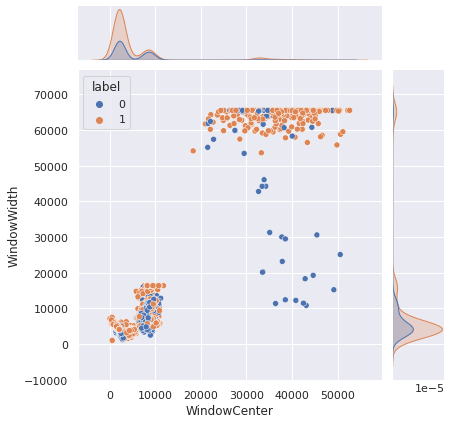

In [108]:
sns.jointplot(data=df, x="WindowCenter", y="WindowWidth", hue="label")

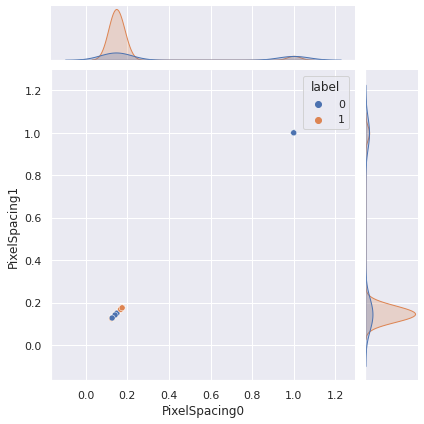

In [109]:
df["PixelSpacing1"] = df["PixelSpacing1"].fillna(1.)
df["PixelSpacing0"] = df["PixelSpacing0"].fillna(1.)
sns.jointplot(data=df, x="PixelSpacing0", y="PixelSpacing1", hue="label")

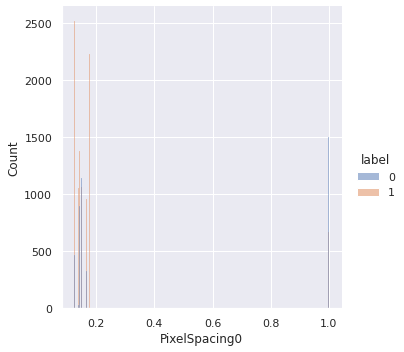

In [110]:
sns.displot(df, x="PixelSpacing0", hue="label")

<AxesSubplot:xlabel='PatientSex', ylabel='count'>

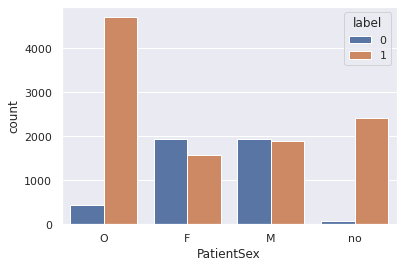

In [111]:
df["PatientSex"] = df["PatientSex"].fillna("no")
sns.countplot(x="PatientSex", hue="label", data=df)

In [117]:
df["PixelSpacing0_no"] = (df["PixelSpacing0"]==1.0).astype(int)
df[['PatientSex', 'PixelSpacing0_no','label','PixelSpacing0','PixelSpacing1']].groupby(['PatientSex', 'PixelSpacing0_no','label']).count()

PixelSpacing0  PixelSpacing1
PatientSex PixelSpacing0_no label                              
F          0                0               1161           1161
                            1               1061           1061
           1                0                775            775
                            1                517            517
M          0                0               1303           1303
                            1               1851           1851
           1                0                635            635
                            1                 51             51
O          0                0                429            429
                            1               4607           4607
           1                0                 11             11
                            1                 98             98
no         0                1               2420           2420
           1                0                 80             80
                            1                  1              1

In [118]:
train_df.value_counts("rad_id")

rad_id
R9     15708
R10    13292
R8     12198
R2      3121
R5      2783
R3      2285
R6      2041
R1      1995
R13     1824
R15     1823
R16     1763
R7      1733
R12     1729
R11     1670
R14     1624
R4      1513
R17      812
dtype: int64

In [119]:
rad_df = train_df.groupby("image_id")["rad_id"].agg(lambda s: "".join(s.sort_values().unique())).reset_index()
rad_df

,image_id,rad_id
0,000434271f63a053c4128a0ba6352c7f,R2R3R6
1,00053190460d56c53cc3e57321387478,R11R2R7
2,0005e8e3701dfb1dd93d53e2ff537b6e,R10R8R9
3,0006e0a85696f6bb578e84fafa9a5607,R11R12R16
4,0007d316f756b3fa0baea2ff514ce945,R10R8R9
...,...,...
14995,ffe6f9fe648a7ec29a50feb92d6c15a4,R10R8R9
14996,ffea246f04196af602c7dc123e5e48fc,R13R4R6
14997,ffeffc54594debf3716d6fcd2402a99f,R10R8R9
14998,fff0f82159f9083f3dd1f8967fc54f6a,R14R8R9


In [120]:
rad_df.value_counts("rad_id")

rad_id
R10R8R9      5501
R2R3R5        115
R1R2R3        104
R2R3R6        100
R12R13R16      99
             ... 
R15R17R8        1
R10R17R4        1
R10R16R9        1
R15R17R9        1
R11R17R4        1
Length: 411, dtype: int64

# meta data

In [ ]:
train_meta = pd.read_csv("../input/dicom-meta/train_meta.csv")
test_meta = pd.read_csv("../input/dicom-meta/test_meta.csv")

In [ ]:
pd.set_option('display.max_columns', None)
train_meta.head()

In [ ]:
train_meta.info()

In [ ]:
train_meta.value_counts("PatientSex")

In [ ]:
train_meta.value_counts("WindowCenter")

In [ ]:
train_meta.value_counts("WindowWidth")

In [ ]:
train_meta.value_counts("NumberOfFrames")

In [ ]:
train_meta.value_counts("NumberOfFrames")